In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from datetime import datetime
import missingno as msno

In [2]:
# These are the datasets uploaded by Jacob to blob storage:
df_app = pd.read_parquet('../do_not_commit/Datasets/AppErrorEvents.parquet')
df_win = pd.read_parquet('../do_not_commit/Datasets/WindowsErrorEvents.parquet')
df_hang = pd.read_parquet('../do_not_commit/Datasets/AppHangEvents.parquet')
df_boot = pd.read_parquet('../do_not_commit/Datasets/BootEvents.parquet')


Do this in one or two ways:
1. Add use suffixes= in pd.merge() to explicitly assign each column/variable to its original error type.
2. Combine values for common columns into the same column, add a new column for each of the 4 for its error type, e.g. "Hang", and not assign column suffixes (use pd.concat([dataframes])).

Given from the original XML exercise columns with the same name in different sets represented the same variable, preferred approach is #2.


In [3]:
print(len(df_app))
print(len(df_win))
print(len(df_hang))
print(len(df_boot))

268149
9836
40811
1593485


In [4]:
df_app['error_type'] = "Application"
df_win['error_type'] = 'Windows'
df_hang['error_type'] = 'Hang'
df_boot['error_type'] = 'Boot'

In [5]:
events = pd.concat([df_app, df_win, df_hang, df_boot])
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912281 entries, 4740 to 4357
Data columns (total 89 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   RWB_EVENTRAWRESULTITEM_ID             float64       
 1   RWB_ETL_EVENT_DESTINATION_IDENTIFIER  int64         
 2   RWB_CREATE_TIMESTAMP                  object        
 3   RWB_EFFECTIVE_DATE                    object        
 4   ID                                    int64         
 5   ClientItemKey                         int64         
 6   LogName                               object        
 7   ProviderName                          object        
 8   ProviderGUID                          object        
 9   EventID                               float64       
 10  EventIDQualifiers                     float64       
 11  Version                               object        
 12  Level                                 float64       
 13  Task        

<AxesSubplot:>

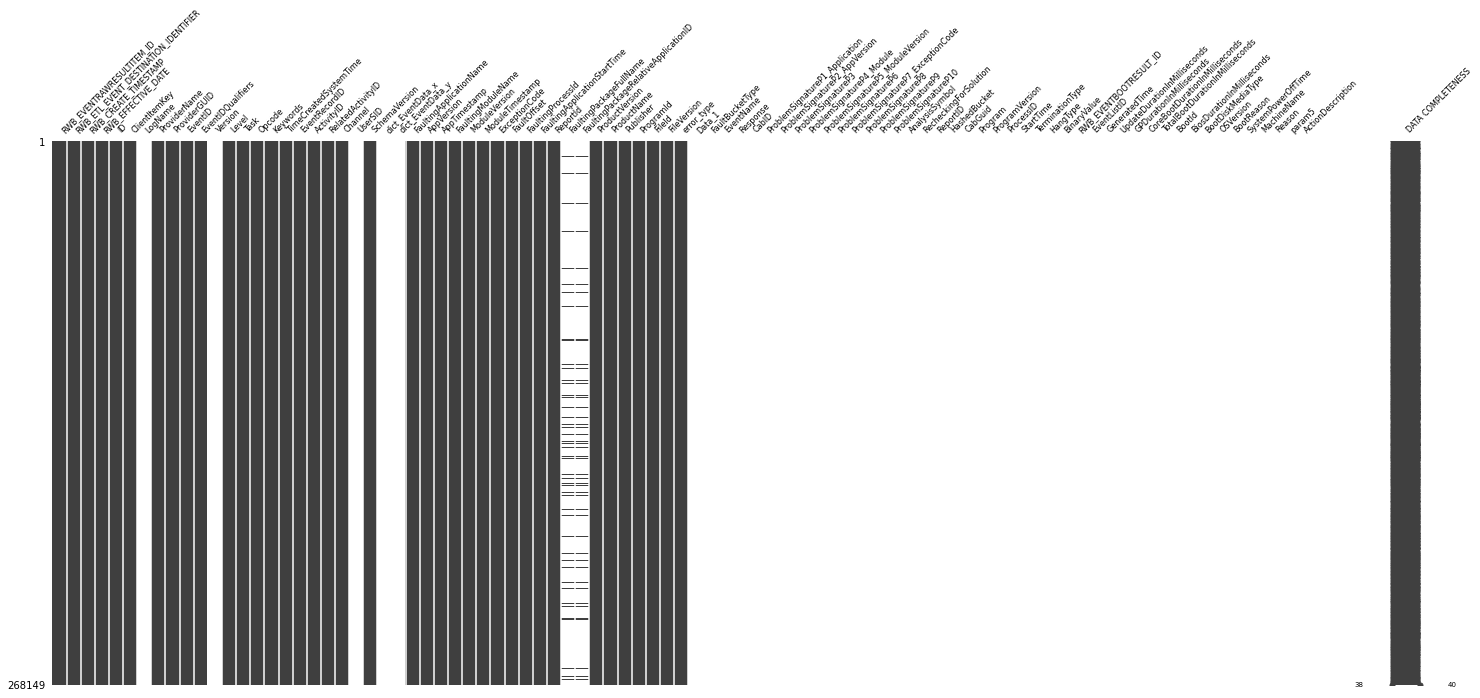

In [6]:
msno.matrix(events[events['error_type'] == 'Application'], labels=True, fontsize=8)

<AxesSubplot:>

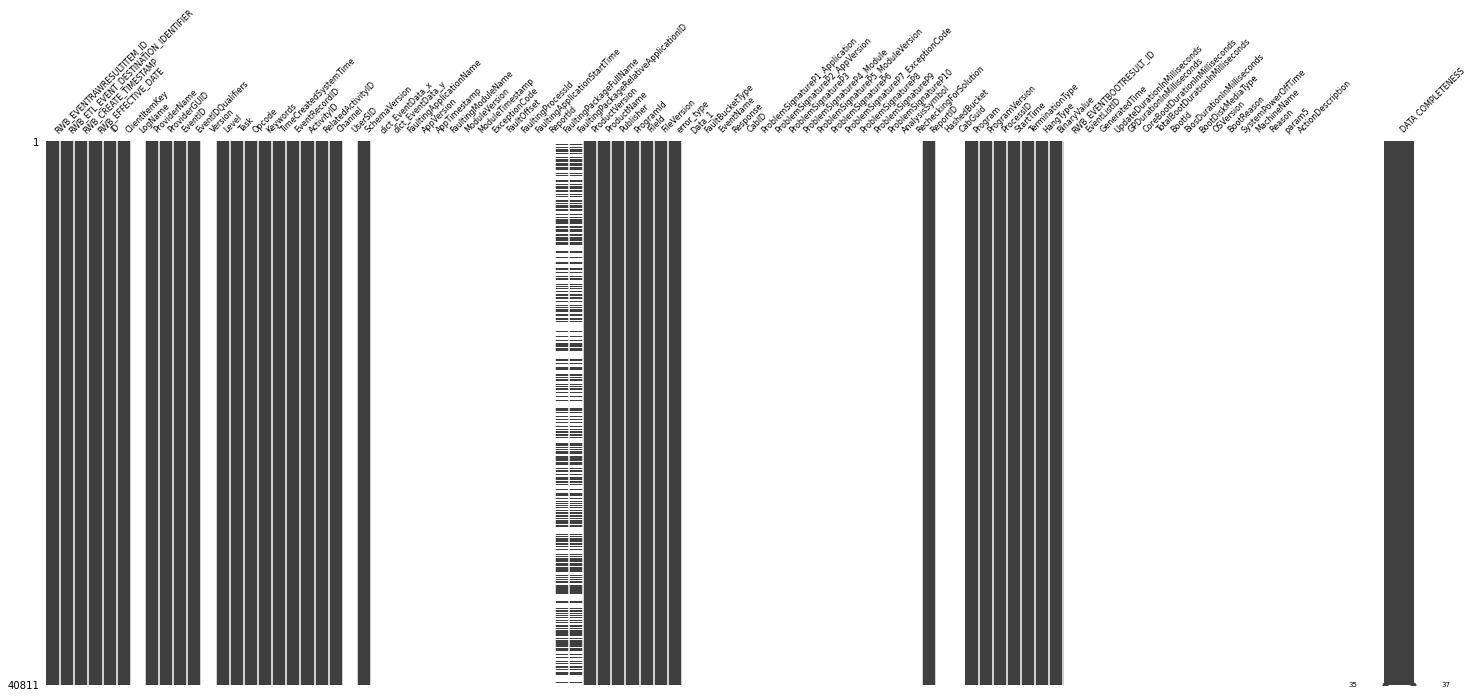

In [7]:
msno.matrix(df[df['error_type'] == 'Hang'], labels=True, fontsize=8)

<AxesSubplot:>

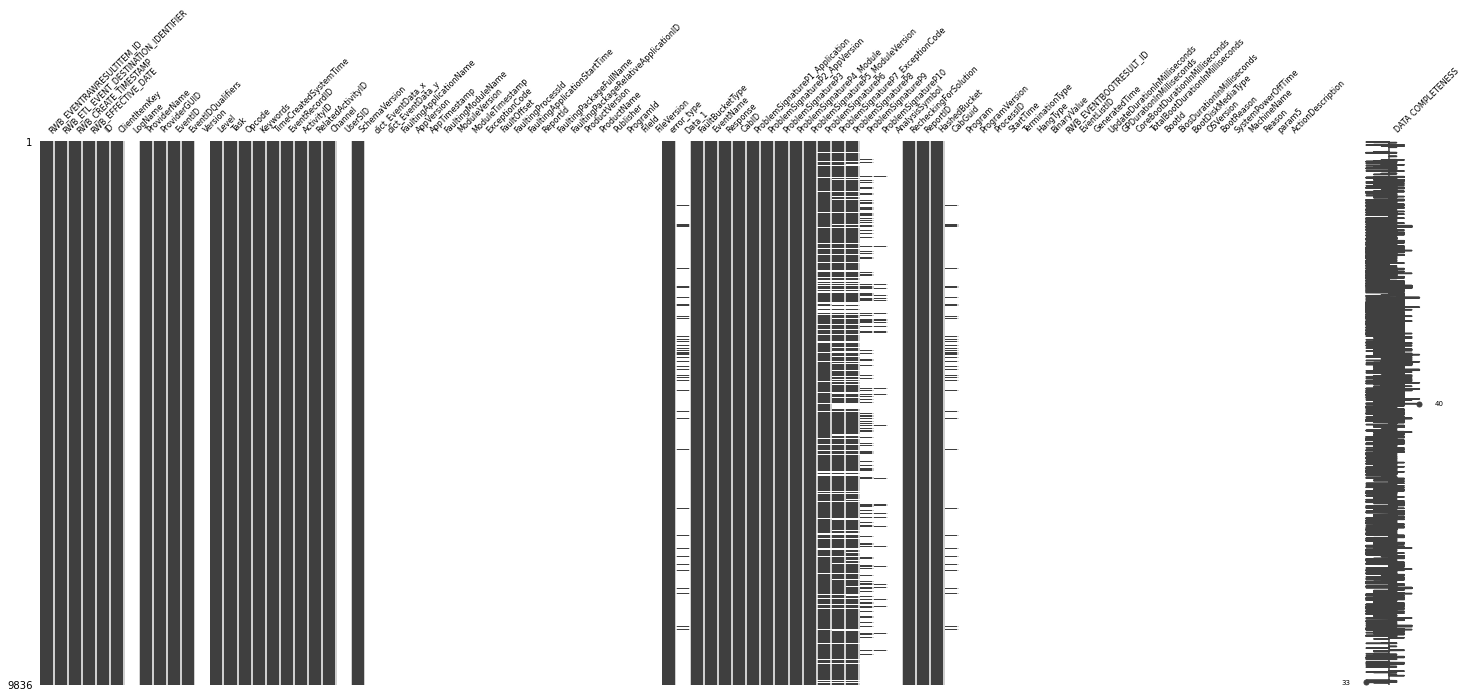

In [8]:
msno.matrix(events[events['error_type'] == 'Windows'], labels=True, fontsize=8)

<AxesSubplot:>

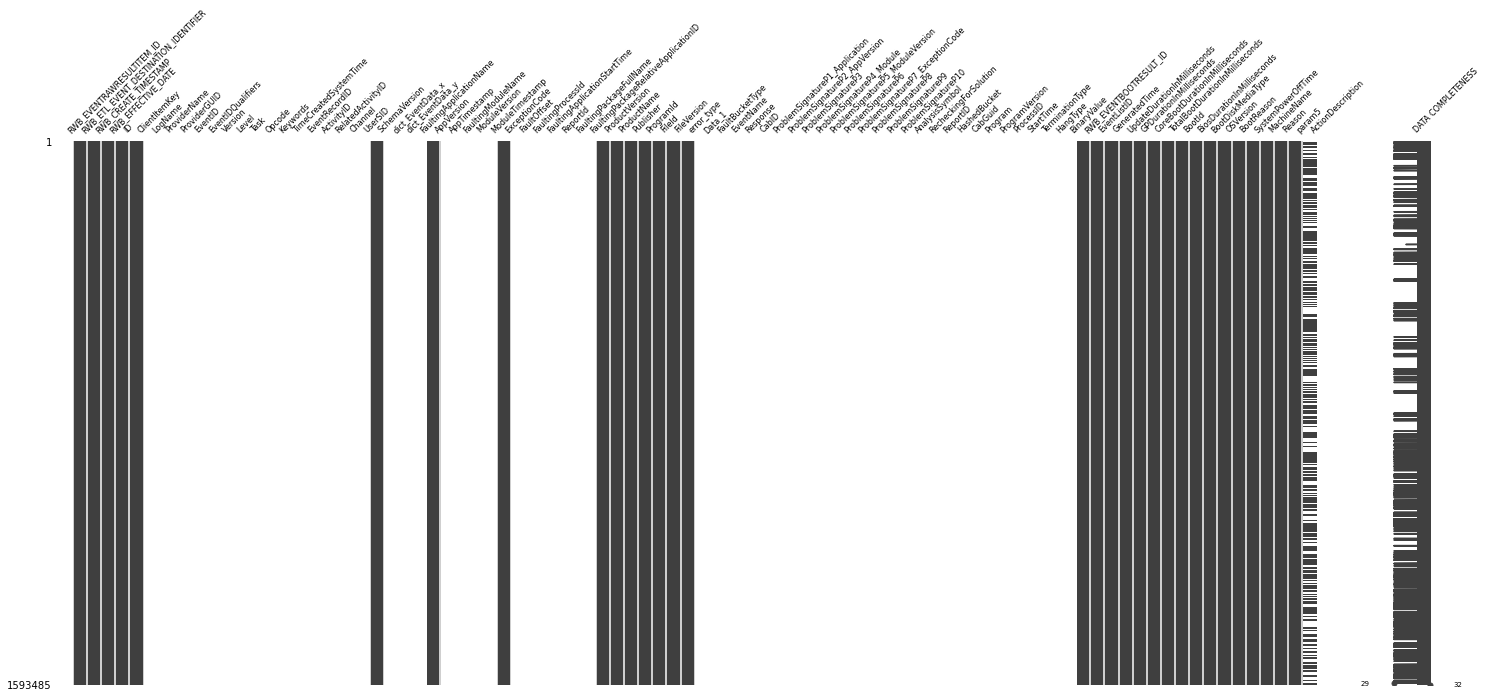

In [9]:
msno.matrix(events[events['error_type'] == 'Boot'], labels=True, fontsize=8)

In [10]:
common_columns = reduce(np.intersect1d, (df_app.columns, df_boot.columns, df_hang.columns, df_win.columns))
common_columns

array(['ClientItemKey', 'ID', 'RWB_CREATE_TIMESTAMP',
       'RWB_EFFECTIVE_DATE', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'SchemaVersion', 'error_type'], dtype=object)

In [42]:
df_boot

,RWB_EVENTBOOTRESULT_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,EventListID,ClientItemKey,GeneratedTime,UpdateDurationInMilliseconds,GPDurationInMilliseconds,...,param5,ActionDescription,ProductVersion,ProductName,Publisher,ProgramId,FileId,FileVersion,ReportId,error_type
0,947407,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078438,3,16809009,2023-01-31 23:05:38.750,0,0,...,restart,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot
1,947576,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078607,3,16795727,2023-01-31 23:53:57.723,0,0,...,restart,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot
2,947577,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078608,3,16795727,2023-01-31 23:53:57.723,0,0,...,restart,Your computer will restart at 1/30/2023 7:00:4...,11882,Endpoint Configuration Manager,Microsoft Corporation,0000AC84AF65760157FA6165F4EB441A1C9D00000000,0000756F01C4A36B3645E10FE6CC99C76511D107E598,1194,None,Boot
3,947644,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078675,3,16797689,2023-02-01 00:18:51.667,0,0,...,restart,Your computer will restart at 1/30/2023 7:00:4...,11882,Endpoint Configuration Manager,Microsoft Corporation,0000AC84AF65760157FA6165F4EB441A1C9D00000000,0000756F01C4A36B3645E10FE6CC99C76511D107E598,1194,None,Boot
4,947738,1251,2023-02-01 09:02:13 -06:00,2023-02-01,72057594043078769,3,16800164,2023-02-01 00:45:31.780,0,0,...,restart,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,1758503,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916547,3,16813869,2023-07-18 13:32:52.237,0,40187,...,power off,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot
4354,1758504,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916548,3,16808648,2023-07-18 13:33:05.090,0,18688,...,restart,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot
4355,1758505,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916549,3,16808648,2023-07-18 13:33:05.090,0,16967,...,restart,Reboot initiated by NightWatchman 7.3,19982,NightWatchman,1E,000048C1361553810B674F3E6F986C5B9D8F00000000,00001F9D35B393AA598CB0FE68DE5F5E6D16E39CA7B1,623,None,Boot
4356,1758507,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916551,3,16818802,2023-07-18 13:33:27.500,0,3166,...,restart,None,8751,Microsoft® Windows® Operating System,Microsoft Corporation,00009D7160A474045C17F6CB8AEC9EA6F61300000000,0000D2A42C5059DB9D3A20C0944004ADE9B2584A27F3,1316,None,Boot



# Join in ServiceNow INC data.


In [11]:
# From Azure database:
machines = pd.read_excel('../do_not_commit/Datasets/Persist_System_DISC.xlsx', )

<AxesSubplot:>

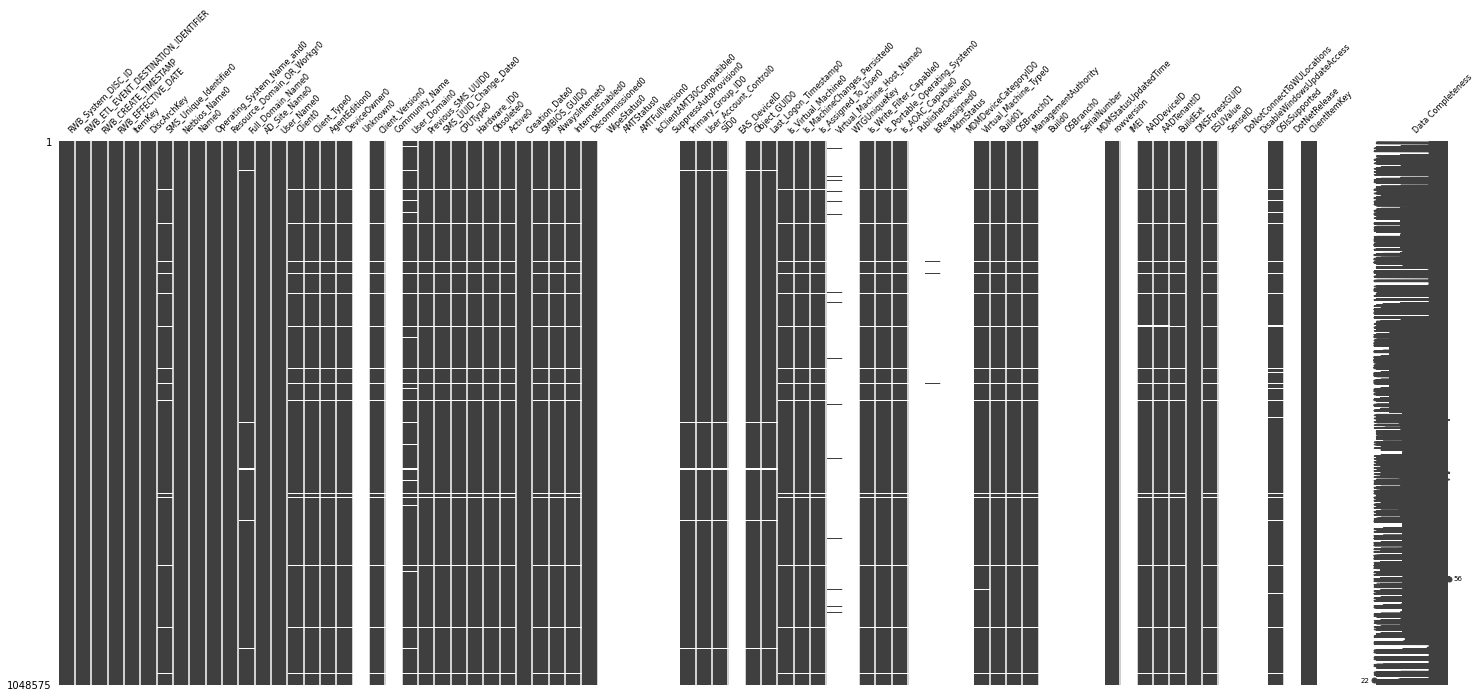

In [28]:
msno.matrix(machines, labels=True, fontsize=8)

In [12]:
# From blob storage:
incs = pd.read_csv('../do_not_commit/Datasets/ServiceNow_Incident.csv', low_memory=False)

<AxesSubplot:>

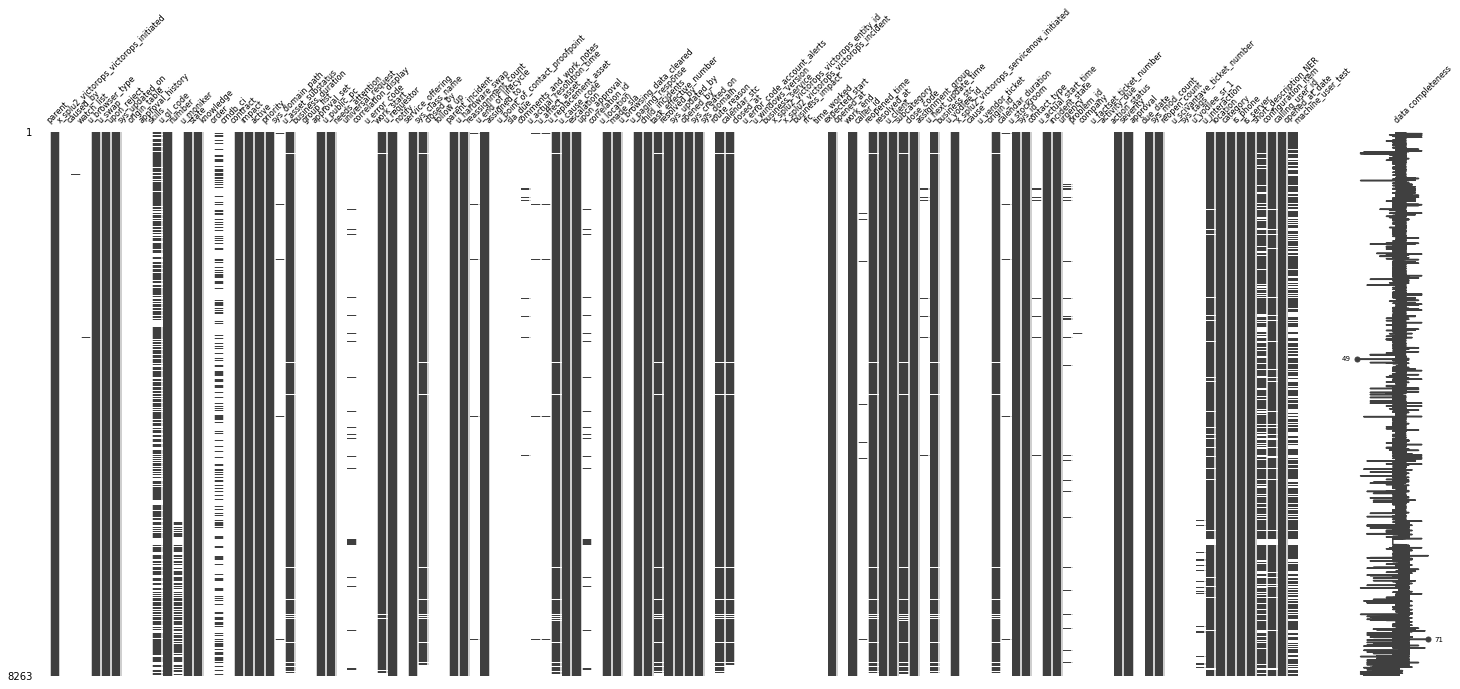

In [13]:
msno.matrix(incs, labels=True, fontsize=8)

In [14]:
machines['ClientItemKey'] = machines['ItemKey'].copy()

In [15]:
machines_events = events.merge(machines[['RWB_EFFECTIVE_DATE', 'ClientItemKey', 'Name0']], on=['RWB_EFFECTIVE_DATE', 'ClientItemKey'])

In [16]:
machines_events.sample(5)

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,BiosDurationInMilliseconds,BootDiskMediaType,OSVersion,BootReason,SystemPowerOffTime,MachineName,Reason,param5,ActionDescription,Name0
993938,NaN,5669,2023-04-12 08:35:25 -05:00,2023-04-12,72057594043445486,16800689,NaN,NaN,NaN,NaN,...,0.0,4.0,7227.0,1074.0,2023-04-10T23:00:47.8152584Z,C:\windows\CCM\CcmExec.exe (LKN-D-U29491),No title for this reason could be found,restart,Your computer will restart at 4/10/2023 7:00:4...,LKN-D-U29491
429379,NaN,996,2023-01-25 09:02:01 -06:00,2023-01-25,72057594043043274,16811446,NaN,NaN,NaN,NaN,...,0.0,4.0,7227.0,1074.0,2023-01-25T10:36:13.7947970Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,MTV-L-U32741
689971,NaN,92,2022-09-13 09:01:47 -05:00,2022-09-13,72057594042348848,16804280,NaN,NaN,NaN,NaN,...,0.0,4.0,5083.0,1074.0,2022-09-12T21:39:22.0275839Z,C:\WINDOWS\Explorer.EXE (AKN-D-U14051),Other (Unplanned),restart,None,AKN-D-U14051
913271,NaN,4119,2023-03-18 08:35:27 -05:00,2023-03-18,72057594043331126,16813330,NaN,NaN,NaN,NaN,...,0.0,4.0,7227.0,1074.0,2023-03-17T07:00:10.7506445Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,MIL-D-U14386
810615,NaN,2197,2023-02-15 08:35:25 -06:00,2023-02-15,72057594043151229,16803912,NaN,NaN,NaN,NaN,...,0.0,4.0,7227.0,1074.0,2023-02-14T18:02:36.8167427Z,C:\Windows\System32\RuntimeBroker.exe (SOHO-L-...,Other (Unplanned),power off,None,SOHO-L-U20234


<AxesSubplot:>

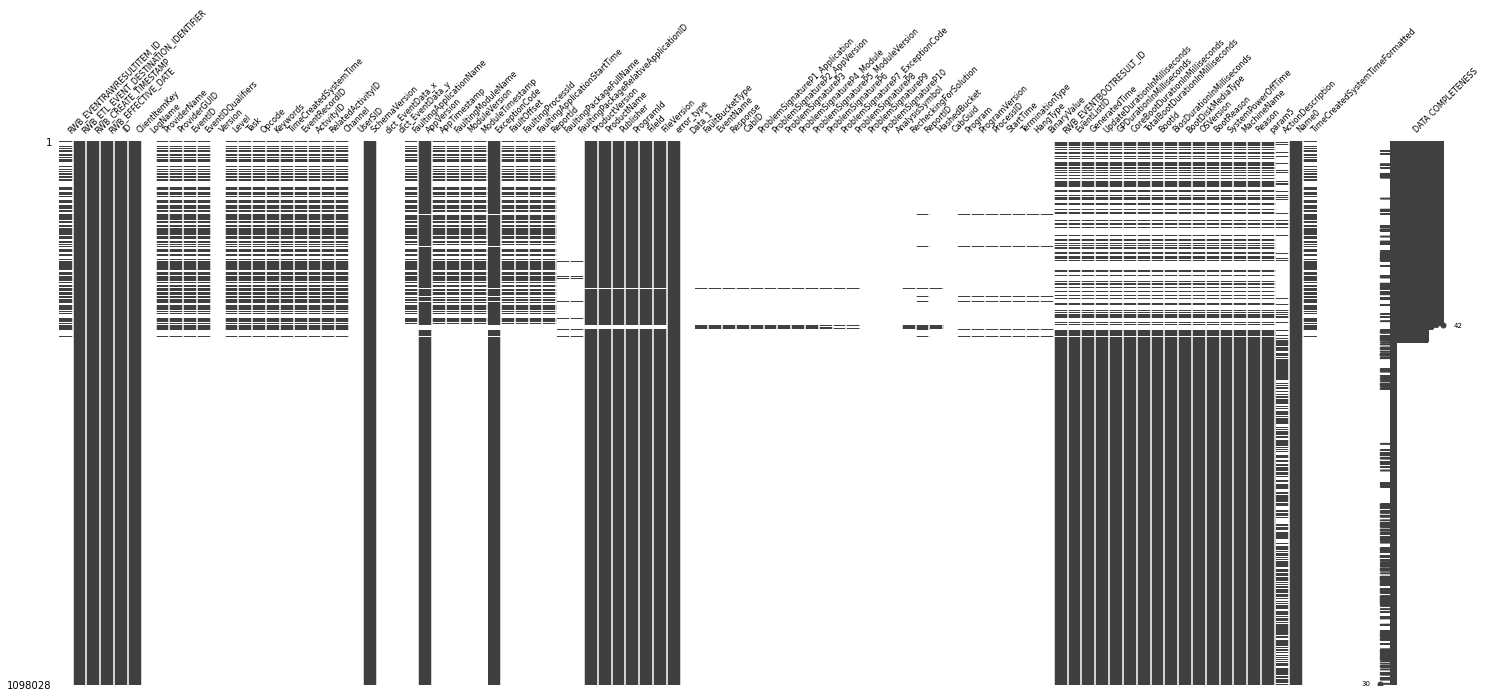

In [35]:
msno.matrix(machines_events, labels=True, fontsize=8)

<AxesSubplot:>

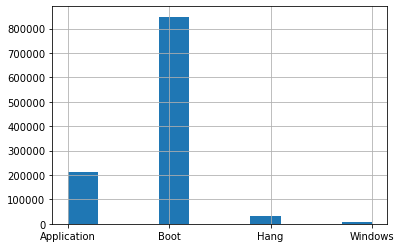

In [36]:
machines_events.sort_values(by=['error_type'])['error_type'].hist()


#### Join INCs to machine + event.


In [47]:
# TimeCreatedSystemTime is all NaT.
# Use 'GeneratedTime' or 'BootId' instead of 'TimeCreatedSystemTime' for 'Boot' errors?
machines_events[machines_events['error_type'].isin(['Application', 'Boot'])].sample(5)

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,BootDiskMediaType,OSVersion,BootReason,SystemPowerOffTime,MachineName,Reason,param5,ActionDescription,Name0,TimeCreatedSystemTimeFormatted
79758,3627994.0,3935,2023-03-15 08:46:15 -05:00,2023-03-15,72057594083512255,16814328,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIL-L-U21504,2023-03-13
128955,2748385.0,2757,2023-02-24 08:46:16 -06:00,2023-02-24,72057594082597522,16814557,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHI-L-U31598,2023-02-23
48752,NaN,4491,2023-03-24 08:35:26 -05:00,2023-03-24,72057594043362635,16814323,NaN,NaN,NaN,NaN,...,4.0,7227.0,1074.0,2023-03-22T19:13:11.7388511Z,C:\Windows\System32\RuntimeBroker.exe (FRT-L-E...,Other (Unplanned),power off,None,FRT-L-E17481,NaN
547226,NaN,8,2022-08-30 09:01:41 -05:00,2022-08-30,72057594042236733,16804808,NaN,NaN,NaN,NaN,...,4.0,5083.0,1074.0,2022-08-22T07:30:35.4832526Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,MIL-L-U30399,NaN
600449,NaN,8,2022-08-30 09:01:41 -05:00,2022-08-30,72057594042154685,16810013,NaN,NaN,NaN,NaN,...,4.0,7227.0,1074.0,2022-08-05T07:34:34.2409748Z,C:\Program Files\1E\NightWatchman\NwmSvc.exe (...,No title for this reason could be found,restart,Reboot initiated by NightWatchman 7.3,GBA-D-U28978,NaN


In [17]:
incs['opened_at'] = pd.to_datetime(incs['opened_at'])

In [18]:
incs['opened_at_formatted'] = incs['opened_at'].dt.strftime('%Y-%m-%d')

In [19]:
machines_events['TimeCreatedSystemTimeFormatted'] = machines_events['TimeCreatedSystemTime'].dt.strftime('%Y-%m-%d')

In [20]:
# incs_merged = machines_merged.merge(incs, left_on='Name0', right_on='configuration_item')
incs_merged = machines_events.merge(incs, left_on=['Name0', 'TimeCreatedSystemTimeFormatted'], right_on=['configuration_item', 'opened_at_formatted'])

In [27]:
print(len(incs_merged))

4303


In [32]:
# Dropping columns with nothing in them.
incs_merged.dropna(axis=1, how='all', inplace=True)

<AxesSubplot:>

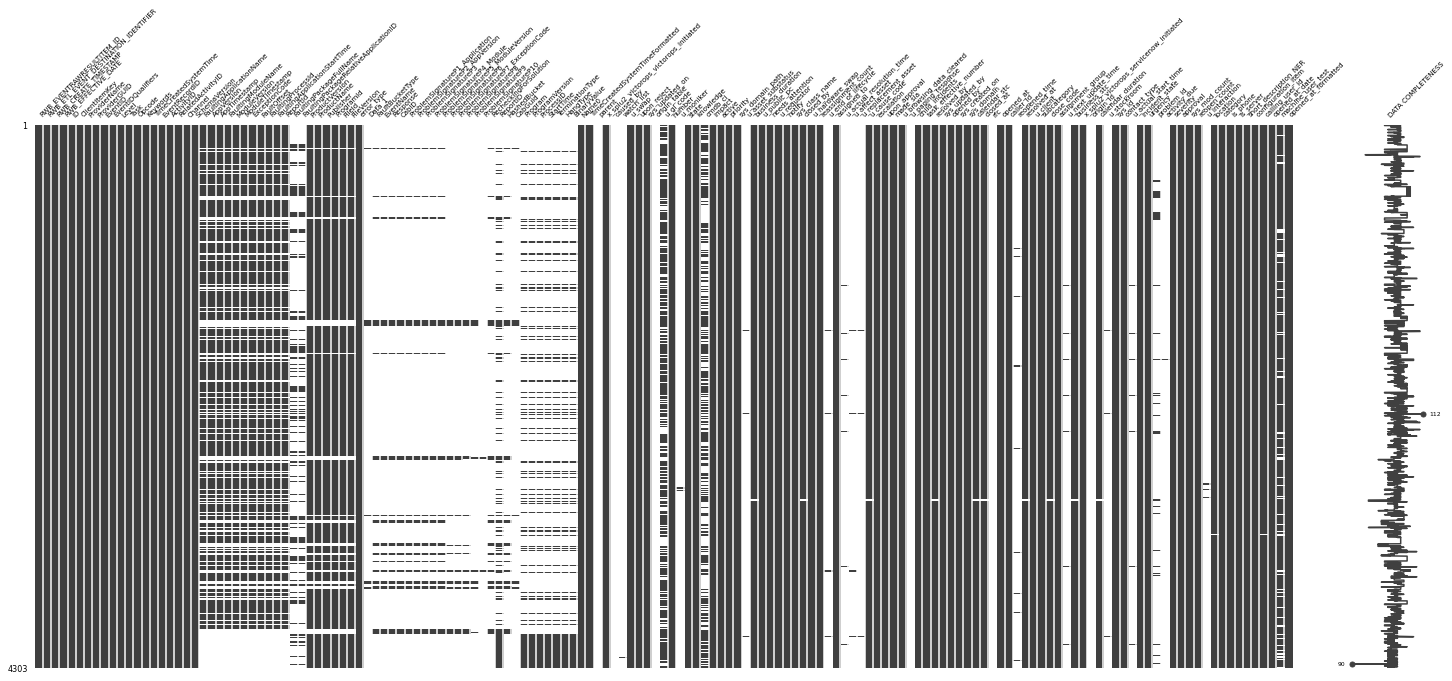

In [34]:
msno.matrix(incs_merged, labels=True, fontsize=7)

In [21]:
# Issues:
# If a separate error is recorded on the same day as an unrelated INC, the two are associated (.loc[210, :])
# Possible fix: reduce the time window from "same day" to "within x hours," e.g. +/-2hrs.
incs_merged.sample(5)[[
    'error_type',
    'OSVersion',
    'FaultingApplicationName',
    'FaultingModuleName',
    # 'FaultingPackageFullName',
    'ProductName',
    'Program',
    'category',
    'subcategory',
    'short_description_NER'
]]

,error_type,OSVersion,FaultingApplicationName,FaultingModuleName,ProductName,Program,category,subcategory,short_description_NER
2955,Hang,NaN,NaN,NaN,Microsoft Outlook,OUTLOOK.EXE,Microsoft Office 365,Office Repair,I 'm in office and my inbox is not refreshing ...
1931,Windows,NaN,NaN,NaN,NaN,NaN,Microsoft Excel 365,Add-In,Missing <PERSON>
3059,Application,NaN,OUTLOOK.EXE,ntdll.dll,Microsoft Outlook,NaN,laptop,performance_slowness_freezing,"Laptop frozen, will not power off"
2981,Application,NaN,OUTLOOK.EXE,unknown,Microsoft Outlook,NaN,microsoft_windows,windows_profile,Hi. <CARDINAL> of our associates is locked o...
937,Hang,NaN,NaN,NaN,Microsoft Outlook,OUTLOOK.EXE,Microsoft Outlook 365,Office Repair,outlook not connecting on computer


In [65]:
incs_merged['number'].unique()

array(['INC0515837', 'INC0515517', 'INC0516099', ..., 'INC0518392',
       'INC0516861', 'INC0516263'], dtype=object)

In [77]:
# INCs w/ multiple events assc. may attribute the event to the INC
# despite the event occurring *after* the INC was already filed.
incs_merged[incs_merged['number'] == 'INC0515837'][[
    'TimeCreatedSystemTimeFormatted',
    'TimeCreatedSystemTime',
    'opened_at',
    'opened_at_formatted',
    'Name0',
    'configuration_item',
    'number',
    'FaultingApplicationName',
    'FaultingModuleName',
    'short_description_NER'
]]

,TimeCreatedSystemTimeFormatted,TimeCreatedSystemTime,opened_at,opened_at_formatted,Name0,configuration_item,number,FaultingApplicationName,FaultingModuleName,short_description_NER
0,2023-04-10,2023-04-10 13:28:18.740,2023-04-10 11:20:00,2023-04-10,TIB-L-U32432,TIB-L-U32432,INC0515837,powershell.exe,BIOSIntf.dll,URGENT| Repeated Blue Screen of Death
1,2023-04-10,2023-04-10 20:23:56.900,2023-04-10 11:20:00,2023-04-10,TIB-L-U32432,TIB-L-U32432,INC0515837,WINWORD.EXE,s_llqgukqx.dll,URGENT| Repeated Blue Screen of Death
2,2023-04-10,2023-04-10 17:35:27.050,2023-04-10 11:20:00,2023-04-10,TIB-L-U32432,TIB-L-U32432,INC0515837,NaN,NaN,URGENT| Repeated Blue Screen of Death
3,2023-04-10,2023-04-10 01:44:28.930,2023-04-10 11:20:00,2023-04-10,TIB-L-U32432,TIB-L-U32432,INC0515837,spoolsv.exe,unknown,URGENT| Repeated Blue Screen of Death
4,2023-04-10,2023-04-10 00:01:17.457,2023-04-10 11:20:00,2023-04-10,TIB-L-U32432,TIB-L-U32432,INC0515837,NaN,NaN,URGENT| Repeated Blue Screen of Death



#### How many multiple INCs were filed on the same day for a given machine?


In [22]:
grouped_counts = incs.groupby(['opened_at_formatted', 'configuration_item']).size()
print(grouped_counts[grouped_counts > 1].sum())
grouped_counts[grouped_counts > 1]

416


opened_at_formatted  configuration_item
2023-01-03           CHI-L-U33511          2
                     LOE-D-U25294          2
                     MWE-L-U29955          2
2023-01-04           MIL-L-U21470          2
                     MIL-L-U30749          2
                                          ..
2023-07-05           MIL-L-U34247          2
                     TCF-L-U34494          2
2023-07-06           MIL-D-U25226          2
2023-07-10           CHI-L-U34590          2
                     PIT-L-U33237          2
Length: 200, dtype: int64

In [23]:
print(machines_events['TimeCreatedSystemTime'].isnull().sum())
print(machines_events['TimeCreatedSystemTime'].notnull().sum())

848633
249395


In [24]:
for col in incs_merged.columns:
    print(col)

RWB_EVENTRAWRESULTITEM_ID
RWB_ETL_EVENT_DESTINATION_IDENTIFIER
RWB_CREATE_TIMESTAMP
RWB_EFFECTIVE_DATE
ID
ClientItemKey
LogName
ProviderName
ProviderGUID
EventID
EventIDQualifiers
Version
Level
Task
Opcode
Keywords
TimeCreatedSystemTime
EventRecordID
ActivityID
RelatedActivityID
Channel
UserSID
SchemaVersion
dict_EventData_x
dict_EventData_y
FaultingApplicationName
AppVersion
AppTimestamp
FaultingModuleName
ModuleVersion
ModuleTimestamp
ExceptionCode
FaultOffset
FaultingProcessId
FaultingApplicationStartTime
ReportId
FaultingPackageFullName
FaultingPackageRelativeApplicationID
ProductVersion
ProductName
Publisher
ProgramId
FileId
FileVersion
error_type
Data_1
FaultBucketType
EventName
Response
CabID
ProblemSignatureP1_Application
ProblemSignatureP2_AppVersion
ProblemSignatureP3
ProblemSignatureP4_Module
ProblemSignatureP5_ModuleVersion
ProblemSignatureP6
ProblemSignatureP7_ExceptionCode
ProblemSignatureP8
ProblemSignatureP9
ProblemSignatureP10
AnalysisSymbol
RecheckingForSolution
Repor

<AxesSubplot:>

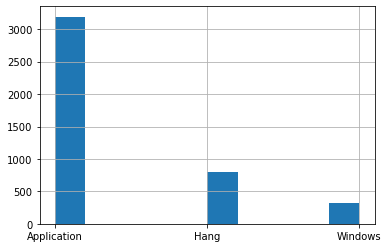

In [25]:
incs_merged.sort_values(by=['error_type'])['error_type'].hist()


# Explore 'Application' errors.


In [48]:
df = incs_merged.copy()

In [85]:
df = df[df['error_type'] == 'Application']
df

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,ProviderName,ProviderGUID,EventID,EventIDQualifiers,...,location,category,is_phone,is_server,short_description_NER,configuration_item,calling_user_id,opened_at_date,machine_user_test,opened_at_formatted
0,4950960.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084846230,16814273,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,URGENT| Repeated Blue Screen of Death,TIB-L-U32432,490.0,2023-04-10,TIB-L-U32432,2023-04-10
1,4950962.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084846232,16814273,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,URGENT| Repeated Blue Screen of Death,TIB-L-U32432,490.0,2023-04-10,TIB-L-U32432,2023-04-10
3,4873717.0,5547,2023-04-10 08:45:57 -05:00,2023-04-10,72057594084767567,16814273,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,URGENT| Repeated Blue Screen of Death,TIB-L-U32432,490.0,2023-04-10,TIB-L-U32432,2023-04-10
7,4958674.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084854087,16807529,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,headset not recognizing headset,MIL-L-U31544,8920.0,2023-04-10,MIL-L-U31544,2023-04-10
9,4960847.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084856329,16814645,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,capital_iq,0,0,CapIQ Excel Add- in not working correctly,CHI-L-U33511,6145.0,2023-04-10,CHI-L-U33511,2023-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,5027491.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084923826,16816907,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,Battery on laptop only lasts about 5 minutes w...,SFN-L-U32827,12026.0,2023-04-11,SFN-L-U32827,2023-04-11
3987,5030297.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084926636,16814501,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,"Unable to start Laptop, repair loop",CHI-L-U31122,3894.0,2023-04-12,CHI-L-U31122,2023-04-12
3988,5047606.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084943998,16802671,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,adobe_acrobat,0,0,PDFs not opening in Thompson One,SEA-L-U29987,14975.0,2023-04-12,SEA-L-U29987,2023-04-12
3989,5047607.0,5733,2023-04-13 08:46:22 -05:00,2023-04-13,72057594084943999,16802671,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,0.0,...,{'link': 'https://rwbaird.service-now.com/api/...,adobe_acrobat,0,0,PDFs not opening in Thompson One,SEA-L-U29987,14975.0,2023-04-12,SEA-L-U29987,2023-04-12



#### How many INCs contain direct reference to BSOD?


In [86]:
len(df[df['short_description_NER'].str.contains("(?i)Blue Screen|BSOD|[Dd]eath")]['number'].unique())

26


#### What is the distribution of FaultApplicationName among INCs?


In [88]:
df['FaultingApplicationName'].value_counts()

powershell.exe                 507
EXCEL.EXE                      268
Acrobat.exe                    182
RuntimeBroker.exe              146
SearchApp.exe                  145
                              ... 
BarcoClickShareSvc.exe           1
Passport.exe                     1
AdobeNotificationClient.exe      1
DesktopInfo.exe                  1
DellOptimizer.exe                1
Name: FaultingApplicationName, Length: 136, dtype: int64


#### What is the distribution of modules among INCs?


In [92]:
df['FaultingModuleName'].value_counts()

KERNELBASE.dll         824
BIOSIntf.dll           504
ntdll.dll              288
Windows.UI.Xaml.dll    115
WavesSvc64.exe         110
                      ... 
b_puuhpvka.dll           1
o_rrrkctrn.dll           1
m_vstosktn.dll           1
f_sbnfpoqx.dll           1
j_zpupthsh.dll           1
Name: FaultingModuleName, Length: 387, dtype: int64


#### Which exception codes are most common among INCs?


In [103]:
df[['FaultingApplicationName', 'ExceptionCode']].value_counts()

FaultingApplicationName     ExceptionCode
powershell.exe              c0000005         504
ShellExperienceHost.exe     c000027b         137
WavesSvc64.exe              c0000005         110
Thomson One 5.0.exe         c0000005         103
TextInputHost.exe           c000027b          95
                                            ... 
PfuSshMonWCFHost.exe        c0000374           1
EXCEL.EXE                   80131623           1
Thomson One 5.0.exe         4000001f           1
Thomson One 5.0 Chrome.exe  c0000005           1
Thomson One 5.0.exe         c000001d           1
Length: 253, dtype: int64